### Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load the data and check the first five rows of the data.

In [2]:
data=pd.read_csv("500 person data.csv")

**Data Dictionary**

**Gender** : Male / Female

**Height** : Number (cm)

**Weight** : Number (Kg)

**Index** : 0 - Extremely Weak, 1 - Weak, 2 - Normal, 3 - Overweight, 4 - Obesity, 5 - Extreme Obesity

In [3]:
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 0 (Example)

What is the weight and gender of the 3rd entry in the dataset (as the index in python starts with 0, 3rd entry index will be 2)?

In [4]:
data[["Gender","Weight"]].loc[2]

Gender    Female
Weight       110
Name: 2, dtype: object

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;">  Question 1
Measures of Central Tendency

Measures of Central Tendency define significant, representative and adequate values for a set of data, depending on what you want to analyze. They are the 

1. mean
2. median
3. mode.
    
These measures of central tendency should be found for the 'Height', 'Weight' and 'Index' variable.

#### Mean

In [5]:
data.mean()

Height    169.944
Weight    106.000
Index       3.748
dtype: float64

#### Median

In [6]:
data.median()

Height    170.5
Weight    106.0
Index       4.0
dtype: float64

#### Mode

In [7]:
data.mode()

,Gender,Height,Weight,Index
0,Female,188.0,50,5.0
1,NaN,NaN,80,NaN
2,NaN,NaN,104,NaN


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;">  Question 2

In physiology and medicine,the Body Surface Area (BSA)  is the measured or calculated surface area of a human body. 
    
BSA(Mosteller) formula :	= √ height (cm) x weight (kg)/ 3600. BSA of The average adult BSA is 1.9 m2.

For example( first row BSA will be square root of (174 * 96/3600) = 2.32 m2)

**Create a column named bsa with the above formula and find out the number of entries which have BSA >= 1.9 m2.** 



In [8]:
data["BSA"]=(data["Height"]*data["Weight"]/3600)**1/2

In [9]:
data.head()

,Gender,Height,Weight,Index,BSA
0,Male,174,96,4,2.320000
1,Male,189,87,2,2.283750
2,Female,185,110,4,2.826389
3,Female,195,104,3,2.816667
4,Male,149,61,3,1.262361


In [10]:
len(data[data["BSA"]>=1.9])

362

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 3
 
 Plot the density graph and overlay mean and median scores for data.
 1. Create density plot kind="density"
 2. create a green line plot for mean  on the density plot.
 3. create a red line plot for median  on the density plot.


##### Method 1:

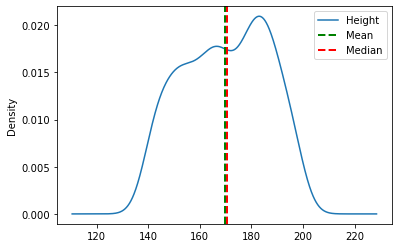

In [10]:
data["Height"].plot(kind="density")
plt.axvline(data["Height"].mean(), linestyle='dashed', linewidth=2,c="g",label="Mean")
plt.axvline(data["Height"].median(), linestyle='dashed', linewidth=2,c="r",label="Median")
plt.legend()
plt.show()

##### Method 2:

C:\Users\NishadPrashantK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


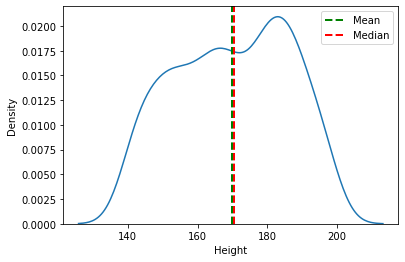

In [11]:
sns.distplot(data["Height"],hist=False)
plt.axvline(data["Height"].mean(), linestyle='dashed', linewidth=2,c="g",label="Mean")
plt.axvline(data["Height"].median(), linestyle='dashed', linewidth=2,c="r",label="Median")
plt.legend()
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 4 
    
What are the index having highest weight(wt) and lowest weight(wt)?

**Hint:** Use idxmax() and idxmin()

The index having highest weight(wt) and lowest weight(wt).

In [12]:
print (data["Weight"].idxmax())
print (data["Weight"].idxmin())

106
85


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 5
    
Check the Range,Variance and Standard Deviation for the variable 'Height'.Also, calculate the mean absolute deviation for the variable 'Height'. 
### The formula for Mean Absolute Deviation (MAD) is: $\frac{\sum_{i}|{x_i} - \bar{x}|}{n}$

Range for height

In [13]:
Ht_max = data.Height.max()
Ht_min = data.Height.min()

print(Ht_max)
print(Ht_min)

199
140


In [14]:
Ht_range = Ht_max - Ht_min
Ht_range

59

Variance for height

In [15]:
data.Height.var()

268.1491623246496

In [16]:
np.var(data['Height'],ddof=1)

268.1491623246496

Standard Deviation of Height

In [17]:
data.Height.std()

16.37526067959376

In [19]:
np.std(data['Height'],ddof=1)

16.37526067959376

Mean Absolute Deviation

In [18]:
data.Height.mad()

14.117344000000001

In [20]:
MAD = (np.sum(np.abs(data['Height'] - data['Height'].mean())))/len(data['Height'])
MAD

14.117344000000001

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 6

**Calculate the five number summary for `Weight` in the given dataset.**

**Hint:** Use .quantile()


In [21]:
five_num = [data["Weight"].quantile(0), 
            data["Weight"].quantile(0.25), 
            data["Weight"].quantile(0.50), 
            data["Weight"].quantile(0.75), 
            data["Weight"].quantile(1)]
print ('Minimum:',five_num[0],'\n25%:',five_num[1],'\n50% or Median:',five_num[2],'\n75%:',five_num[3],'\nMaximum:',five_num[4])

Minimum: 50.0 
25%: 80.0 
50% or Median: 106.0 
75%: 136.0 
Maximum: 160.0


In [22]:
data.Weight.describe()

count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 7

**Calculate the Inter-Quartile Range(IQR) for `Height` in the given dataset.**



Interquartile range (IQR) is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile.

**Hint:** IQR = Q3 - Q1

In [23]:
data["Height"].quantile(0.75) - data["Height"].quantile(0.25)

28.0

In [24]:
from scipy import stats

In [25]:
stats.iqr(data['Height'])

28.0

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 8
    
**Basic EDA**
* Find the shape (number of rows and columns) of the data,data types of different variables.
* Check the presence of missing values.
* Descriptive statistics of the different numerical columns

In [26]:
data.shape

(500, 5)

In [27]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
BSA       0
dtype: int64

In [28]:
data.describe()

,Height,Weight,Index,BSA
count,500.000000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000,2.501986
std,16.375261,32.382607,1.355053,0.803418
min,140.000000,50.000000,0.000000,1.011111
25%,156.000000,80.000000,3.000000,1.816667
50%,170.500000,106.000000,4.000000,2.493750
75%,184.000000,136.000000,5.000000,3.157465
max,199.000000,160.000000,5.000000,4.328333


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 9
 
 **Plot the Histograms, distribution plot and also find skewness of each column.**

In [29]:
data.columns[1:5]

Index(['Height', 'Weight', 'Index', 'BSA'], dtype='object')

C:\Users\NishadPrashantK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NishadPrashantK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NishadPrashantK\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

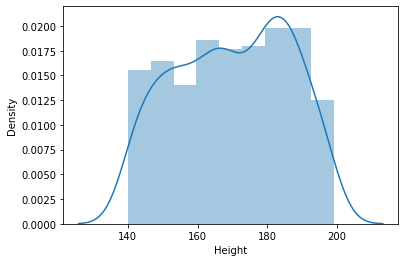

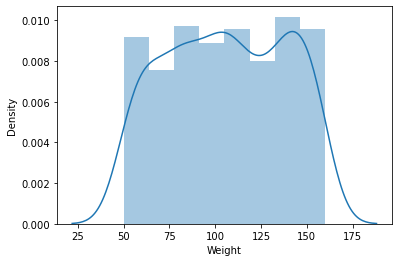

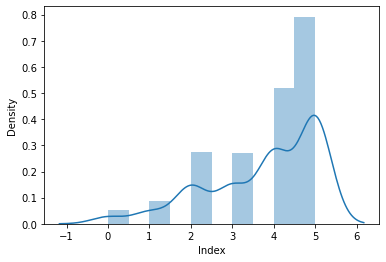

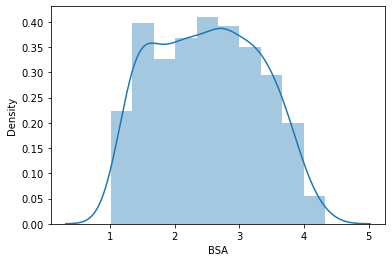

In [30]:
for i,col in enumerate(data.columns[1:5]):
    plt.figure(i)
    sns.distplot(data[col])

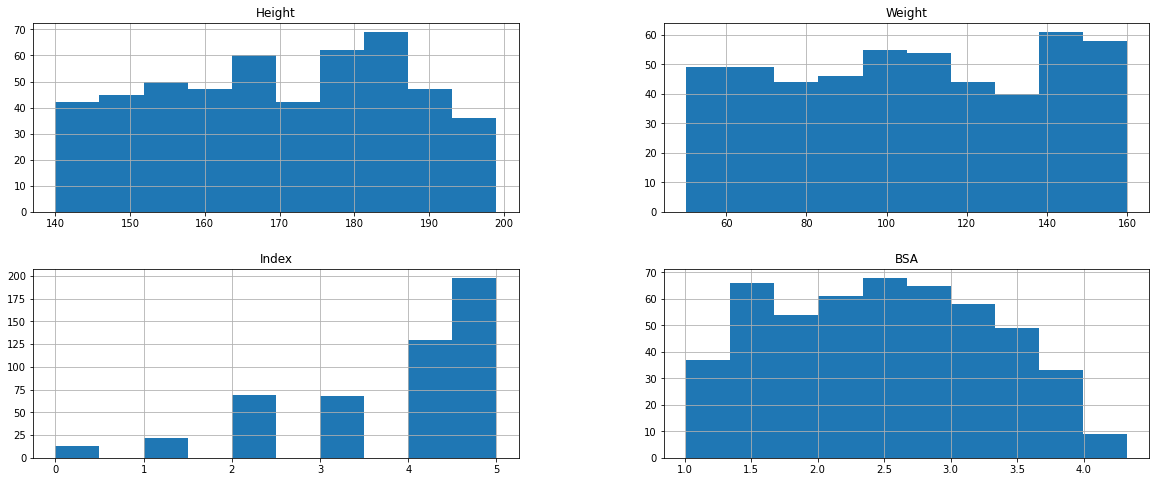

In [31]:
#Plots to see the distribution of the continuous variables
data.hist(figsize=(20,8))
plt.show()

1. **Index is looking left skewed**
2. **Height, Weight seems be be distributed quiet uniformly**
3. **BSA looks quiet symmetrically distributed**

In [32]:
data.skew()

Height   -0.121914
Weight   -0.037692
Index    -0.927799
BSA       0.084146
dtype: float64

- As seen in the histogram above Index is highly negatively skewed.
- All other variables are hardly skewed.

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 10
  
  **Check Outliers (box plots)**

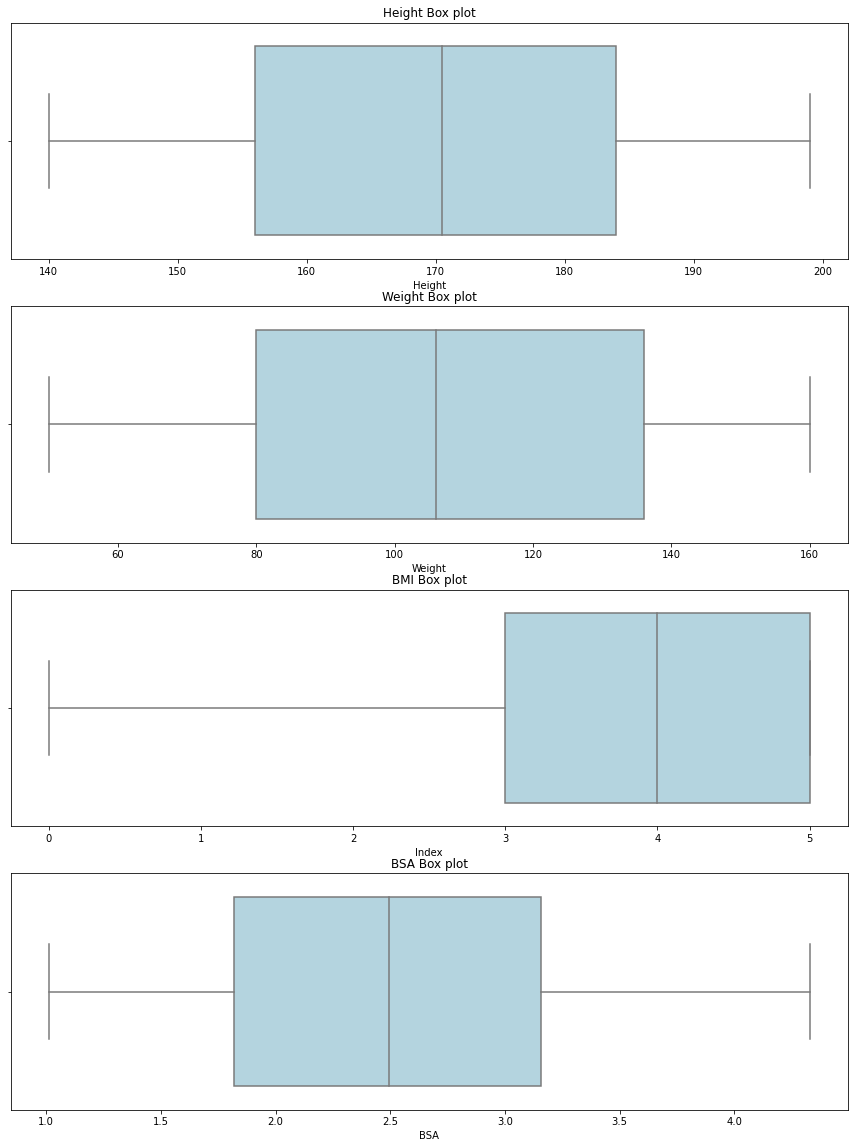

In [33]:
plt.figure(figsize= (15,20))
plt.subplot(4,1,1)
sns.boxplot(x= data["Height"], color='lightblue')
plt.title('Height Box plot')

plt.subplot(4,1,2)
sns.boxplot(x= data["Weight"], color='lightblue')
plt.title('Weight Box plot')

plt.subplot(4,1,3)
sns.boxplot(x= data["Index"], color='lightblue')
plt.title('BMI Box plot')

plt.subplot(4,1,4)
sns.boxplot(x= data["BSA"], color='lightblue')
plt.title('BSA Box plot')

plt.show()

No Outliers present in the data.

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 11

**Plot Count Plot for 'Gender' and 'Index'.Plot another countplot of Index with 'Gender' as hue.**

Count plot gives us the plot for the occurrence of each of the observations of the variables for which we draw a count plot.

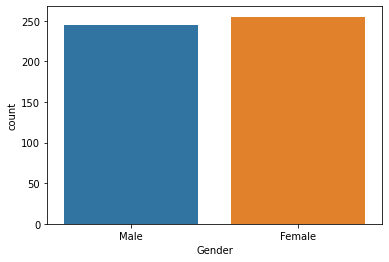

In [34]:
sns.countplot(x=data['Gender'])
plt.show()

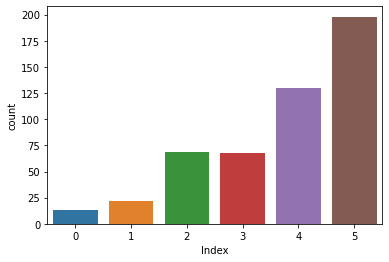

In [35]:
sns.countplot(x=data['Index'])
plt.show()

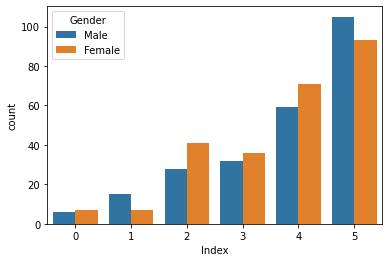

In [36]:
sns.countplot(x="Index", hue="Gender", data=data);

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 12
    
**Check Correlation**

To find out the correlation we will use the corr function and also we will plot a heatmap to visualise this correlation.

In [37]:
corr = data.corr()
corr

,Height,Weight,Index,BSA
Height,1.000000,0.000446,-0.422223,0.299081
Weight,0.000446,1.000000,0.804569,0.950047
Index,-0.422223,0.804569,1.000000,0.657192
BSA,0.299081,0.950047,0.657192,1.000000


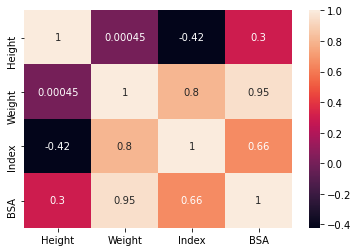

In [38]:
sns.heatmap(corr, annot=True)
plt.show()

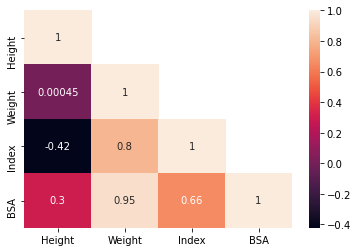

In [39]:
sns.heatmap(corr, annot=True,mask=np.triu(corr,+1))
plt.show()

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 13
    
Do the distribution of Weight and Height differ across Gender ? Plot histograms and boxplots to check.

Check for weight.

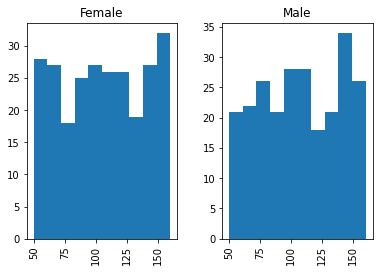

In [40]:
data.hist(by="Gender", column="Weight");

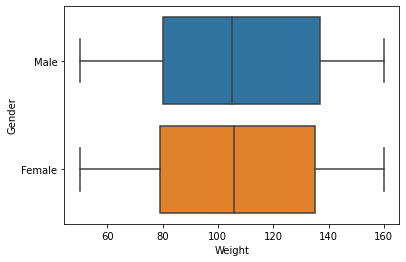

In [41]:
sns.boxplot(x=data.Weight,y=data.Gender)
plt.show()

Check for height.

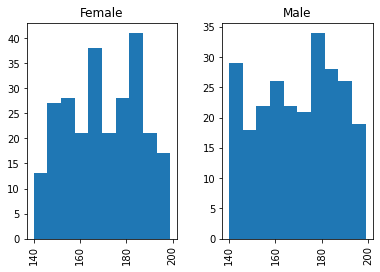

In [42]:
data.hist(by="Gender", column="Height");

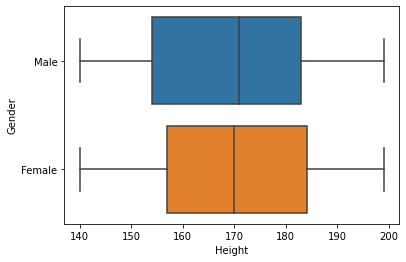

In [43]:
sns.boxplot(x=data.Height,y=data.Gender)
plt.show()

 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 14
    
Print the Index wise Heights of Females and Males. Hint: Use pd.pivot_table()

In [44]:
pd.pivot_table(data,"Height" ,index="Gender",columns="Index")

Index,0,1,2,3,4,5
Gender,,,,,,
Female,186.571429,184.142857,171.682927,176.944444,174.338028,161.569892
Male,188.666667,185.066667,178.035714,174.906250,173.322034,160.457143


 <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> Question 15
    
Plot the pairplot for various continuous variables with 'Gender' as hue.

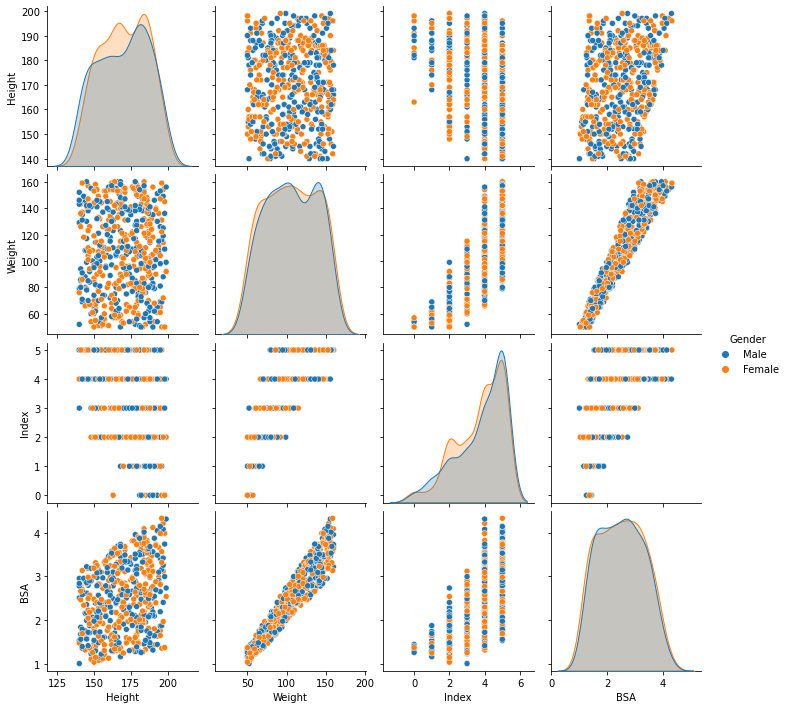

In [45]:
sns.pairplot(data,hue='Gender');

# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;"> **Probability**

In [47]:
from scipy import stats # Many functions for probability distributions in python are in scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Problem on Normal Distributions

	According to the Telecommunication Industry the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. 

-   What is the probability that a randomly selected cell phone bill is more than Rs 1200?
-	What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?
-	What is the probability that a randomly selected cell phone bill is no more than Rs 650?
-	What is the amount above which lies top 15% of cell phone bills?
-	What is the amount below which lies bottom 25% of cell phone bills?


This is a problem of normal probability distribution. Though the distribution is not mentioned, in absence of any other information we assume normality in the population. 

### What is the probability that a randomly selected cell phone bill is more than Rs 1200?

In [48]:
#To calculate this, we will calculate the cumulative probability for less than 1200 and then will subtract from 1.

1-stats.norm.cdf(1200,loc=850,scale=150)

0.009815328628645315

### What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?

In [49]:
stats.norm.cdf(1200,loc=850,scale=150)-stats.norm.cdf(750,loc=850,scale=150)

0.7376921338244318

### What is the probability that a randomly selected cell phone bill is no more than Rs 650?

In [50]:
stats.norm.cdf(650,loc=850,scale=150)

0.09121121972586788

### What is the amount above which lies top 15% of cell phone bills?

In [51]:
#Let the amount be M. Pr(X ≥ M) = 15% => 1 – Pr(X < M) = 0.85 . To calculate this we will use the percent point function i.e ppf.

stats.norm.ppf(0.85,loc=850,scale=150)

1005.4650084240685

### What is the amount below which lies bottom 25% of cell phone bills?

In [52]:
stats.norm.ppf(0.25,loc=850,scale=150)

748.8265374705877

# END